In [3]:
dirs = ["adp/20210722_final", "adp/20210723-1"]
vars = ["rt"]#, "dspace", "splitrt", "sspace", "tspace"]

for v in vars:
    df = pd.DataFrame()
    for d in dirs:
        df = pd.concat([df, pd.read_pickle("/usr/app/output/xlsx/%s/%s.pkl" % (d, v))])
        #if d == 'vi/20210623-1':
        #    df.drop(df.tail(1).index,inplace=True)

    print(df)
    df.to_pickle("/usr/app/output/xlsx/adp/20210730_final_for_real/%s.pkl" % v)



                            T  trip_max  iterations  samples           time
[adp-(1000 None)]-[1-20]  1.0      20.0      1000.0      NaN     195.975099
[adp-(1000 None)]-[2-20]  2.0      20.0      1000.0      NaN    3133.872377
[adp-(1000 None)]-[3-20]  3.0      20.0      1000.0      NaN   10102.046454
[adp-(1000 None)]-[4-20]  4.0      20.0      1000.0      NaN   16264.983433
[adp-(1000 None)]-[5-20]  5.0      20.0      1000.0      NaN   35401.330547
[adp-(1000 None)]-[1-20]  1.0      20.0      1000.0      NaN     195.975099
[adp-(1000 None)]-[2-20]  2.0      20.0      1000.0      NaN    3133.872377
[adp-(1000 None)]-[3-20]  3.0      20.0      1000.0      NaN   10102.046454
[adp-(1000 None)]-[4-20]  4.0      20.0      1000.0      NaN   16264.983433
[adp-(1000 None)]-[5-20]  5.0      20.0      1000.0      NaN   35401.330547
[adp-(1000 None)]-[6-20]  6.0      20.0      1000.0      NaN   43514.475505
[adp-(1000 None)]-[1-40]  1.0      40.0      1000.0      NaN     222.327529
[adp-(1000 N

In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager
import numpy as np
from mpl_axes_aligner import align

from src.modules import plotter as p
from src.modules.analysis import analyseValue, createScenarios, runScen
from src.modules.probabilities import Probabilities
from src.modules import plotter as plttr

plt.style.use(['seaborn-paper','science','no-latex', 'std-colors'])
matplotlib.rc("font", family="Times New Roman")    
plts = []

In [2]:
# Config
param = {"T": 5, "trip_max": 40, "iterations_adp": 1000, "samples_adp": None}
states = '[%s-%s]-statespace' % (param["T"], param["trip_max"])
algos = ['mo', "adp"]
iniState = '0,40.0,0.0,0.0,0.044,0.039'
prob = Probabilities()
runs = [("Value Iteration - 25kWh Battery", "vi/20210722_final_25kWh"), 
        ("Value Iteration - 50kWh Battery", "vi/20210722_final_50kWh"), 
        ("Myopic Optimization", "mo/20210722_final"), 
        ("Approx. Dynamic Programming (1000,all)", "adp/20210710-1")]

In [21]:
# Load decisions
dict_dec = {}

lookup = ["[vi]-[%s-%s]" % (param["T"], param["trip_max"]), 
             "[mo]-[%s-%s]" % (param["T"], param["trip_max"]), 
             "[adp-(%s %s)]-[%s-%s]" % (param["iterations_adp"], param["samples_adp"], param["T"], param["trip_max"])]

dict_dec["mo"] = None # Not relevant for MO
dict_dec["adp"] = pd.read_pickle("/usr/app/output/xlsx/%s/%s-lookup.pkl" % (runs[3][1],lookup[2])).set_index('s_key', drop=False)


# Load states

app = App("vi")
T = 5
trip_max = 40

df_states = app.constructStates(T, trip_max, None).reset_index()
df_states["t"] = df_states["s_obj"].apply(lambda s: s.get_t())
df_states = df_states.set_index("t",drop=True)
analyseValue(dict_dec, iniState, prob, df_states[["s_key","s_obj"]], param)

/opt/conda/envs/ma-simulation/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/conda/envs/ma-simulation/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/conda/envs/ma-simulation/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

/opt/conda/envs/ma-simulation/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/conda/envs/ma-simulation/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/conda/envs/ma-simulation/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

/opt/conda/envs/ma-simulation/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/conda/envs/ma-simulation/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/opt/conda/envs/ma-simulation/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

KeyboardInterrupt: 

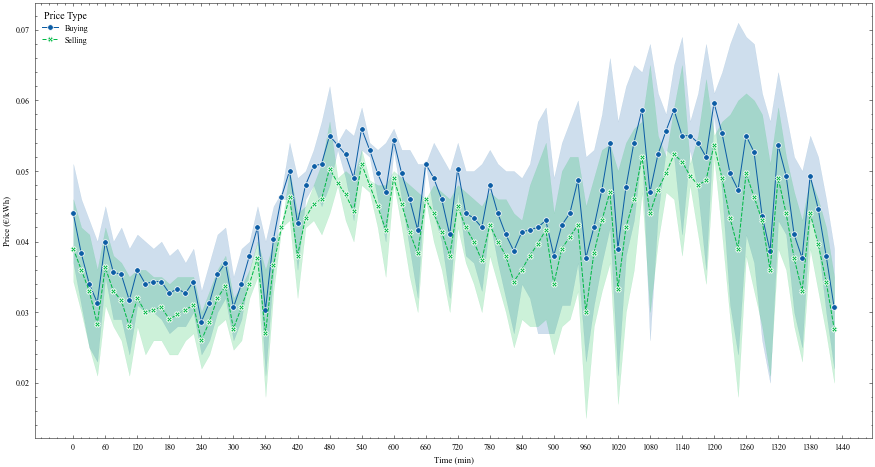

In [3]:
# [GEN] => see data analysis
## 1. Electricity prices for buy and sell with error bars at time
d_prc_b = pd.read_pickle("/usr/app/data/probabilities/d_prc_b.pkl") 
d_prc_s = pd.read_pickle("/usr/app/data/probabilities/d_prc_s.pkl") 
d_prc_b["type"] = "b"
d_prc_s["type"] = "s"
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax=ax, data=pd.concat([d_prc_b, d_prc_s]), x="t", y="prc", hue="type",style="type", markers=True,  legend = False)
plttr.formatPlot(g, "Time (min)" , "Price (€/kWh)","Buying and Selling Prices with Error Bounds" , np.arange(0, 1441, 60), None, "Price Type", ['Buying', 'Selling'], "upper left")
plts = [("prob_prc_t", plt.gcf())]


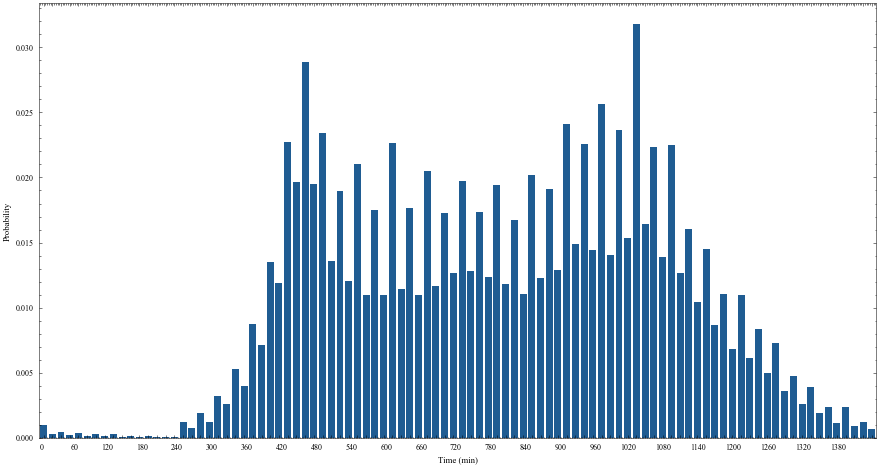

In [4]:
## 2. Probability to start trip at time
d_trpstrt = pd.read_pickle("/usr/app/data/probabilities/trpstrt.pkl") 
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.barplot(ax=ax, data=d_trpstrt, x="t", y="p(t)", color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0])

plttr.formatPlot(g, "Time (min)" ,"Probability","Tripstart Probability", dense=4)

plts += [("prob_trpstrt", plt.gcf())]


In [5]:
## 3. Probability for trip length according to length and time
d_trpln = pd.read_pickle("/usr/app/data/probabilities/trplen.pkl") 
d_trpln = pd.melt(d_trpln.iloc[:,:-1].copy(), id_vars=['t'], var_name = "Length", value_name = "d(t)")
d_trpln["d(t)"] = d_trpln["d(t)"]*100
d_trpln["d(t)"] = d_trpln["d(t)"].astype("int32")
d_trpln_pivot = d_trpln.pivot("t", "Length", "d(t)")


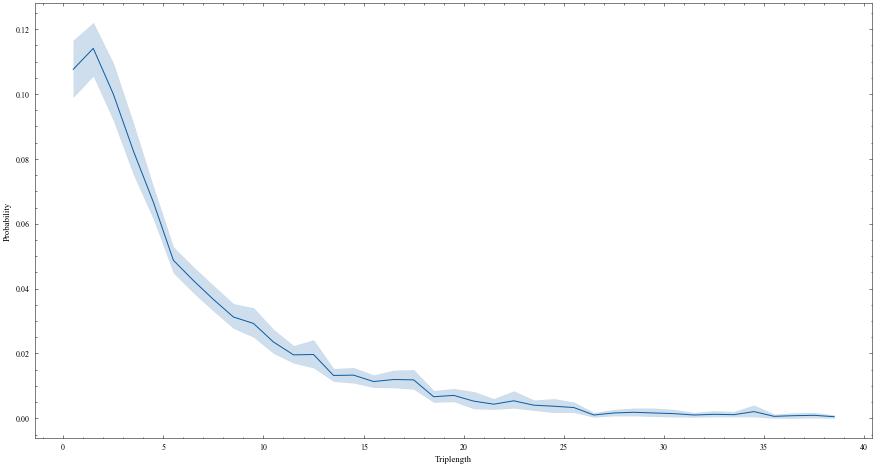

In [6]:
f, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(x=d_trpln["Length"], y=d_trpln["d(t)"]/100, markers=True, legend = False)
plttr.formatPlot(g, "Triplength", "Probability", "Avg. Probability of Triplengths with Error Bounds")
plts += [("prob_trpln_agg", plt.gcf())]

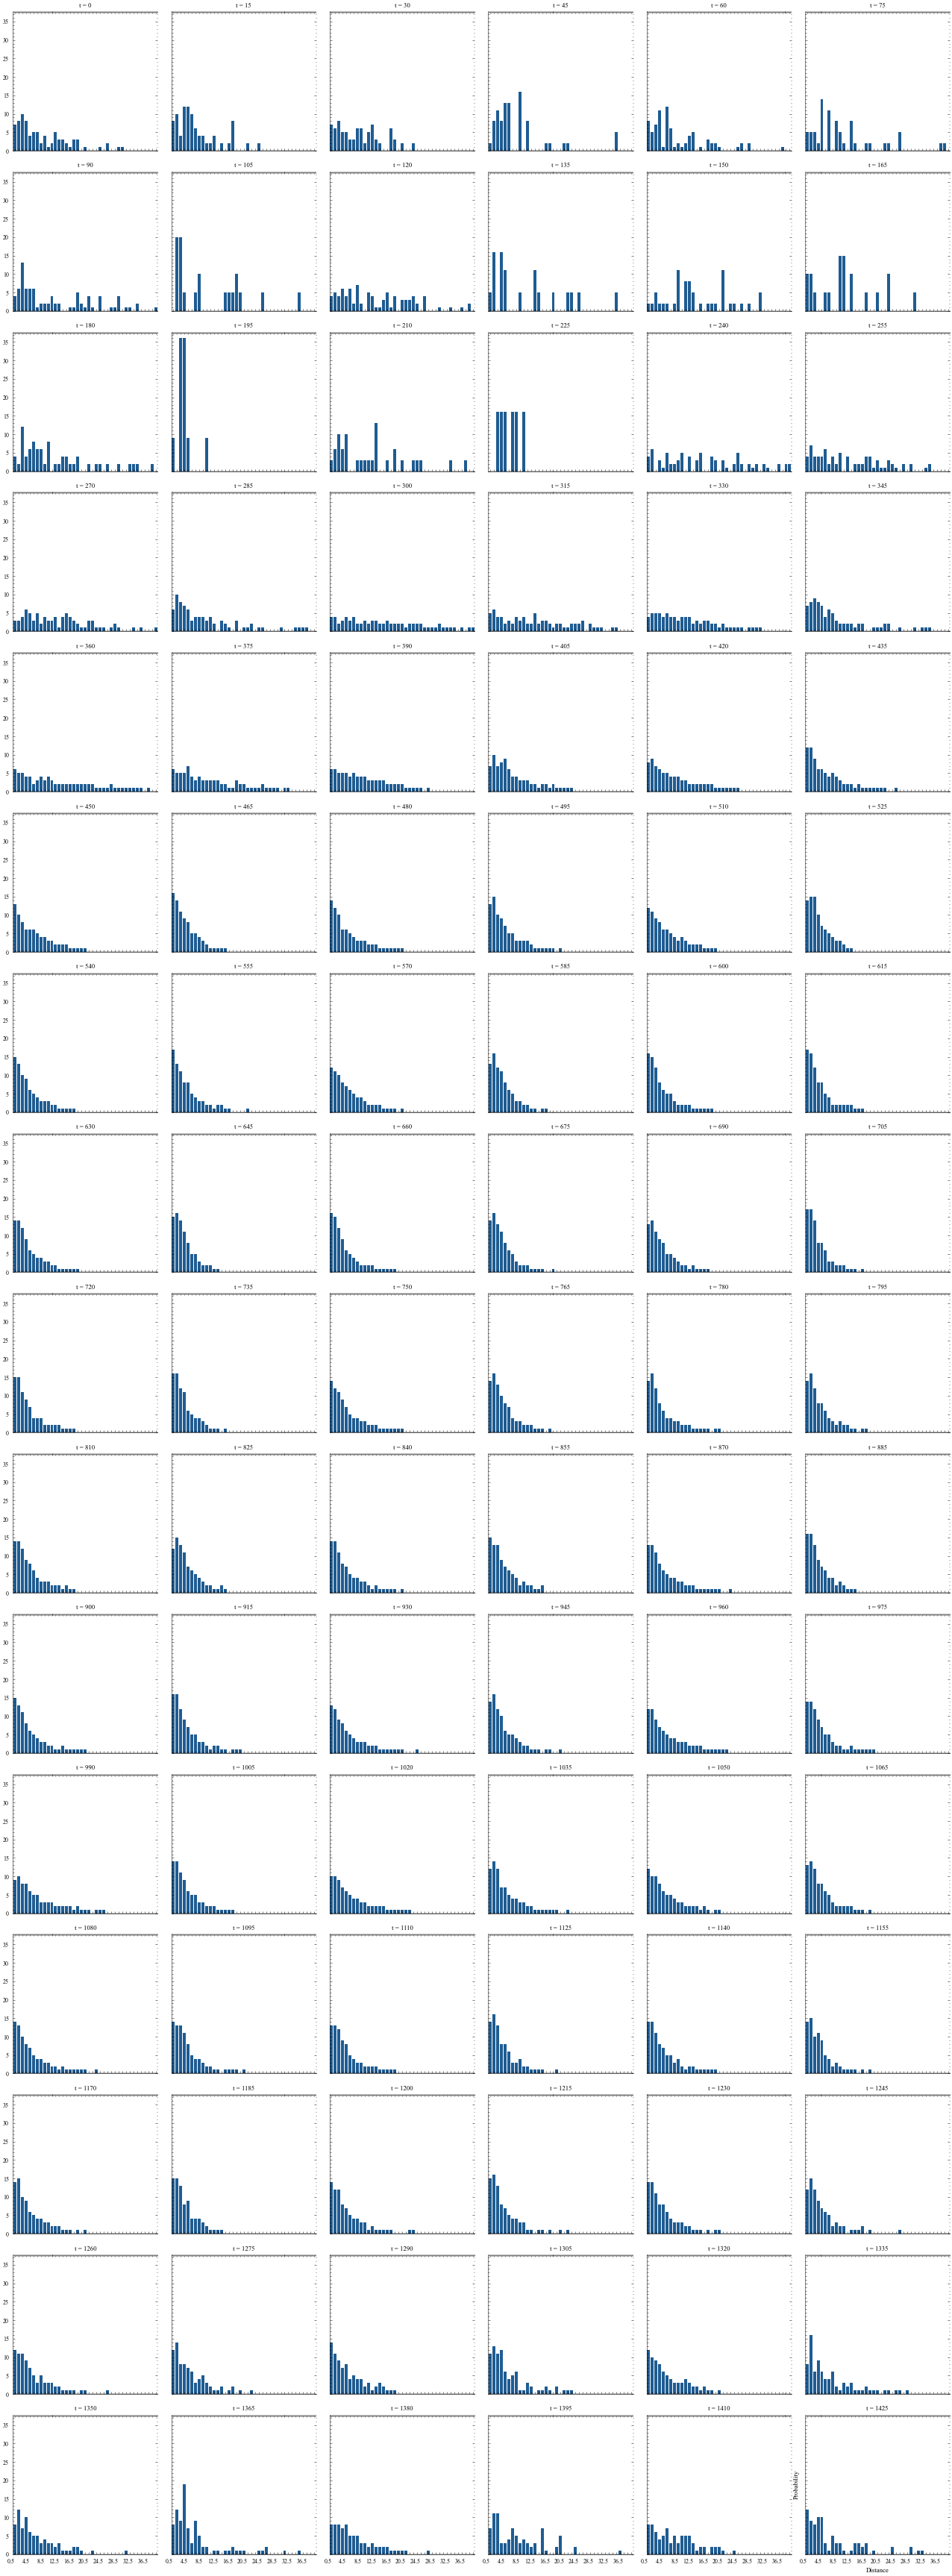

In [6]:
g = sns.FacetGrid(d_trpln, col="t", col_wrap = 6)
g.map_dataframe(sns.barplot, x="Length", y="d(t)")
plttr.formatPlot(g, "Distance", "Probability", "Probability of Triplengths per Time Index", dense=4)

plts += [("prob_trpln_indiv", plt.gcf())]

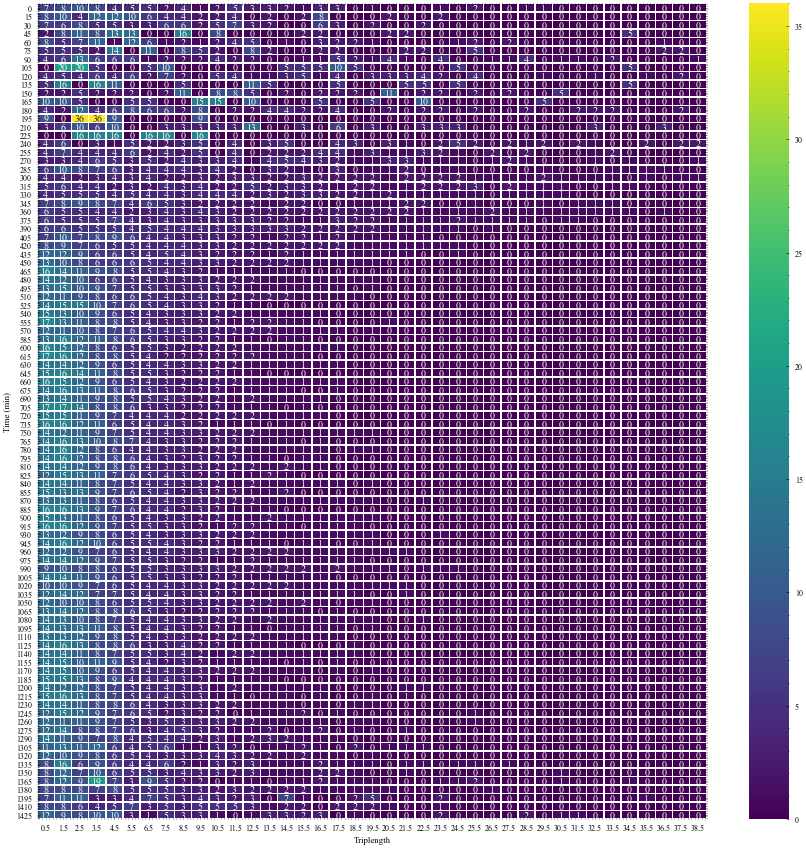

In [7]:
f, ax = plt.subplots(figsize=(15, 15))
g = sns.heatmap(d_trpln_pivot, annot=True, fmt="d", linewidths=.5, ax=ax, cmap = sns.color_palette("viridis", as_cmap=True))
plttr.formatPlot(g, "Triplength", "Time (min)", "Probability of Triplengths")
plts += [("prob_trpln_heat", plt.gcf())]

        T trip_max  amount
[1-1]   1        1    1836
[2-1]   2        1   18117
[3-1]   3        1   34398
[4-1]   4        1   50679
[5-1]   5        1   66960
[1-5]   1        5    3672
[2-5]   2        5   92313
[3-5]   3        5  180954
[1-10]  1       10    5967
[2-10]  2       10  266463
[1-20]  1       20   10557
[1-30]  1       30   15147
        T trip_max  amount
[1-1]   1        1    3636
[2-1]   2        1   36117
[3-1]   3        1   68598
[4-1]   4        1  101079
[5-1]   5        1  133560
[1-5]   1        5    7272
[2-5]   2        5  184113
[1-10]  1       10   11817


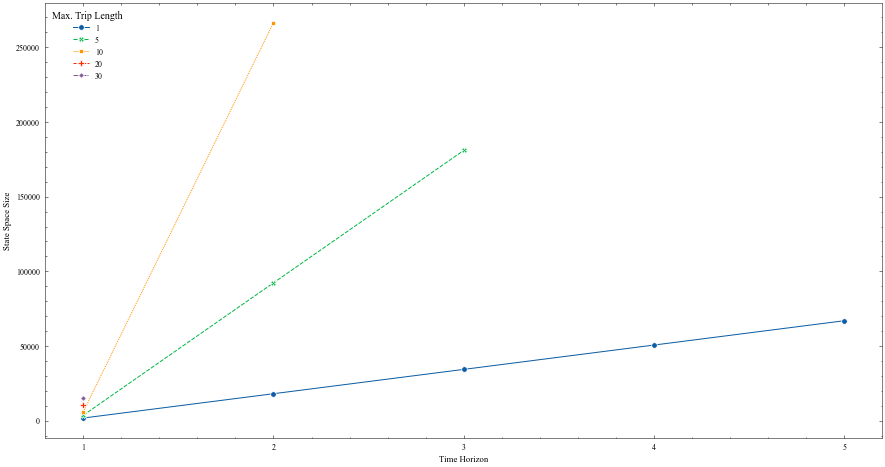

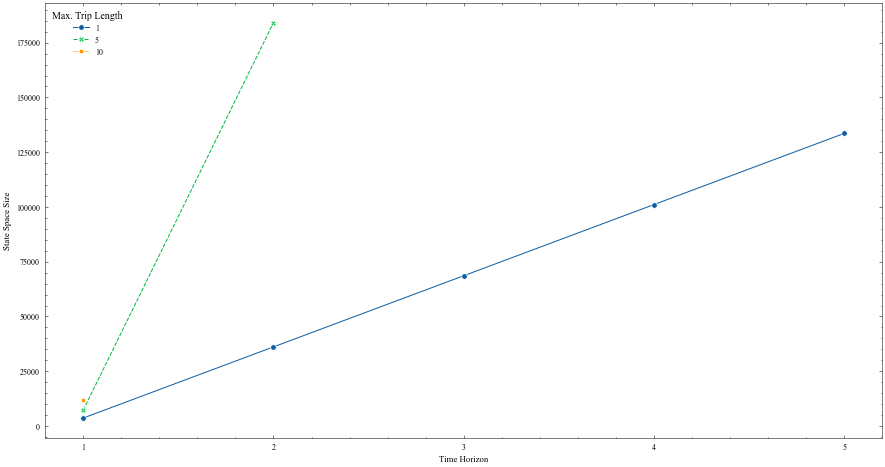

In [35]:
# 2.[VI] State comparison in dependence of parameters
stateSpace = pd.read_pickle("/usr/app/output/xlsx/%s/sspace.pkl" % runs[0][1]).astype({"trip_max":str,"amount": int, "T": int})
print(stateSpace)
f, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax=ax, data=stateSpace, x="T", y="amount", hue = "trip_max", style="trip_max", markers=True, legend = False)
plttr.formatPlot(g, "Time Horizon", "State Space Size", "Value Iteration - State Space Size for Different Parameters",np.arange(1, stateSpace["T"].max()+1), None, "Max. Trip Length", [str(x) for x in stateSpace.trip_max.unique()], "upper left")
plts += [("vi_state_space_25", plt.gcf())]

stateSpace = pd.read_pickle("/usr/app/output/xlsx/%s/sspace.pkl" % runs[1][1]).astype({"trip_max":str,"amount": int, "T": int})
print(stateSpace)
f, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax=ax, data=stateSpace, x="T", y="amount", hue = "trip_max", style="trip_max", markers=True, legend = False)
plttr.formatPlot(g, "Time Horizon", "State Space Size", "Value Iteration - State Space Size for Different Parameters",np.arange(1, stateSpace["T"].max()+1), None, "Max. Trip Length", [str(x) for x in stateSpace.trip_max.unique()], "upper left")
plts += [("vi_state_space_50", plt.gcf())]

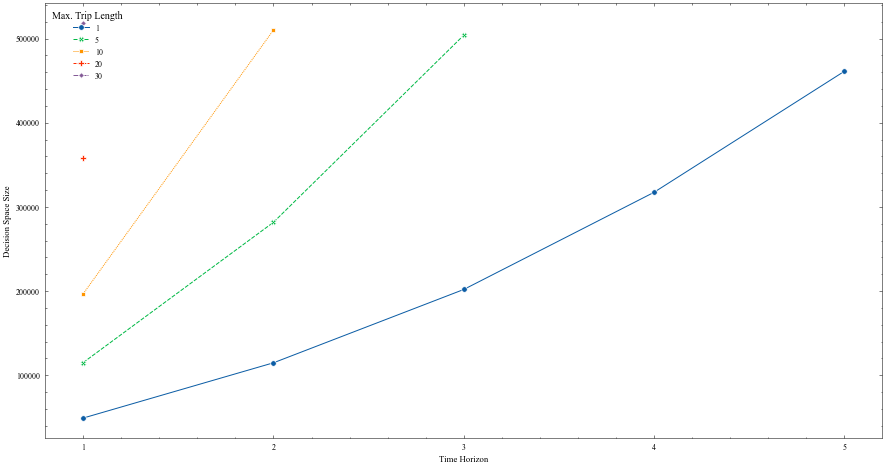

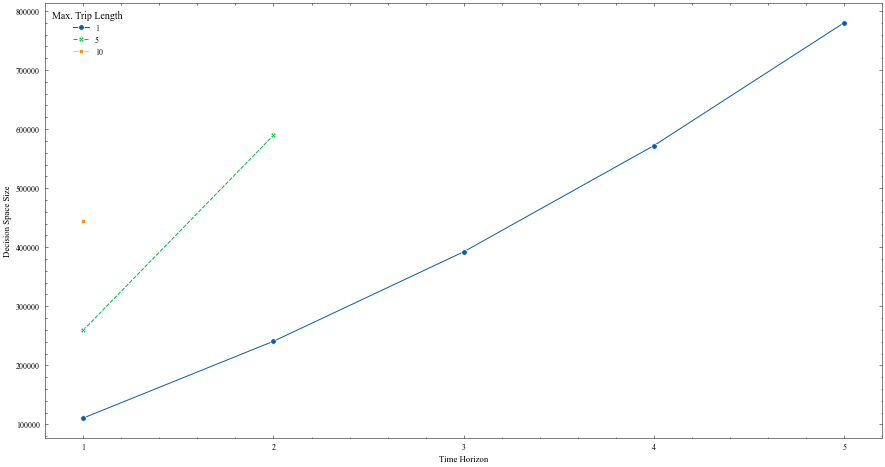

In [36]:
# 2.[VI] Decision comparison in dependence of parameters
decisionSpace = pd.read_pickle("/usr/app/output/xlsx/%s/dspace.pkl" % runs[0][1]).astype({"trip_max":str,"amount": int, "T": int})

f, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax=ax, data=decisionSpace, x="T", y="amount", hue = "trip_max", style="trip_max", markers=True, legend = False)
plttr.formatPlot(g, "Time Horizon", "Decision Space Size", "Value Iteration - Decision Space Size for Different Parameters",np.arange(1, decisionSpace["T"].max()+1), None, "Max. Trip Length", [str(x) for x in decisionSpace.trip_max.unique()], "upper left")
plts += [("vi_decision_space_25", plt.gcf())]

# 2.[VI] Decision comparison in dependence of parameters
decisionSpace = pd.read_pickle("/usr/app/output/xlsx/%s/dspace.pkl" % runs[1][1]).astype({"trip_max":str,"amount": int, "T": int})

f, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax=ax, data=decisionSpace, x="T", y="amount", hue = "trip_max", style="trip_max", markers=True, legend = False)
plttr.formatPlot(g, "Time Horizon", "Decision Space Size", "Value Iteration - Decision Space Size for Different Parameters",np.arange(1, decisionSpace["T"].max()+1), None, "Max. Trip Length", [str(x) for x in decisionSpace.trip_max.unique()], "upper left")
plts += [("vi_decision_space_50", plt.gcf())]

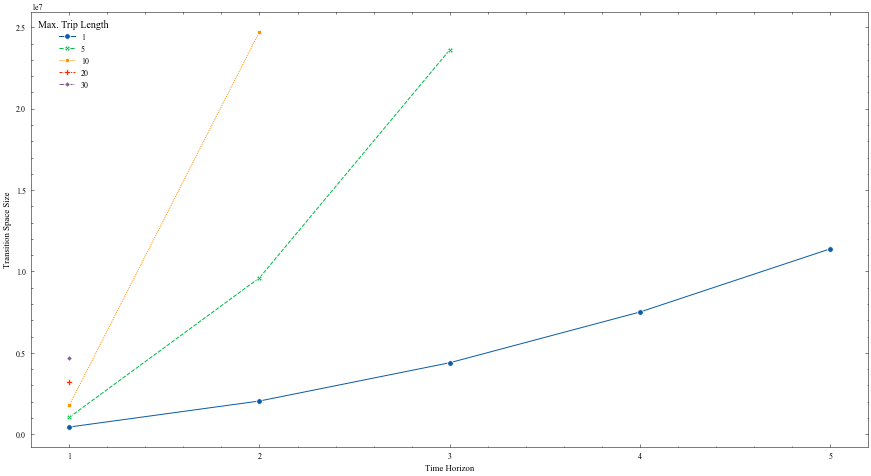

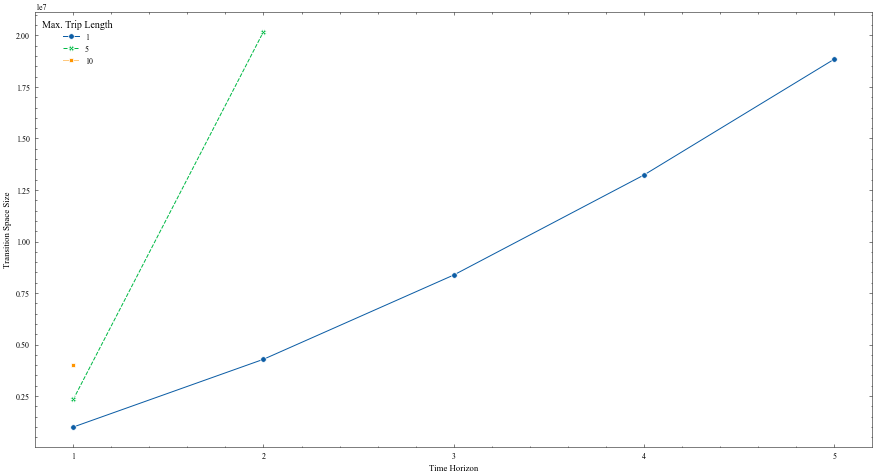

In [37]:
# 2.[VI] Total comparison in dependence of parameters
transitionSpace = pd.read_pickle("/usr/app/output/xlsx/%s/tspace.pkl" % runs[0][1]).astype({"trip_max":str,"amount": int, "T": int})

f, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax=ax, data=transitionSpace, x="T", y="amount", hue = "trip_max", style="trip_max", markers=True, legend = False)
plttr.formatPlot(g, "Time Horizon", "Transition Space Size", "Value Iteration - Transition Space Size for Different Parameters",np.arange(1, transitionSpace["T"].max()+1), None, "Max. Trip Length", [str(x) for x in transitionSpace.trip_max.unique()], "upper left")
plts += [("vi_transition_space_25", plt.gcf())]

transitionSpace = pd.read_pickle("/usr/app/output/xlsx/%s/tspace.pkl" % runs[1][1]).astype({"trip_max":str,"amount": int, "T": int})

f, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax=ax, data=transitionSpace, x="T", y="amount", hue = "trip_max", style="trip_max", markers=True, legend = False)
plttr.formatPlot(g, "Time Horizon", "Transition Space Size", "Value Iteration - Transition Space Size for Different Parameters",np.arange(1, transitionSpace["T"].max()+1), None, "Max. Trip Length", [str(x) for x in transitionSpace.trip_max.unique()], "upper left")
plts += [("vi_transition_space_50", plt.gcf())]

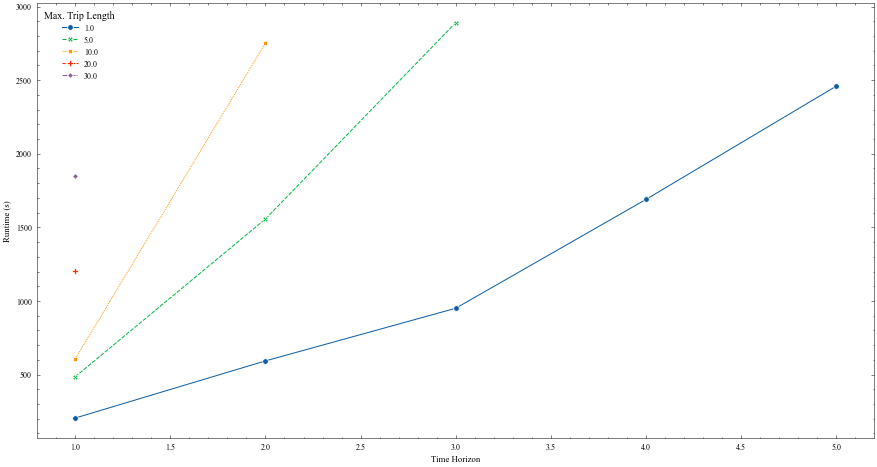

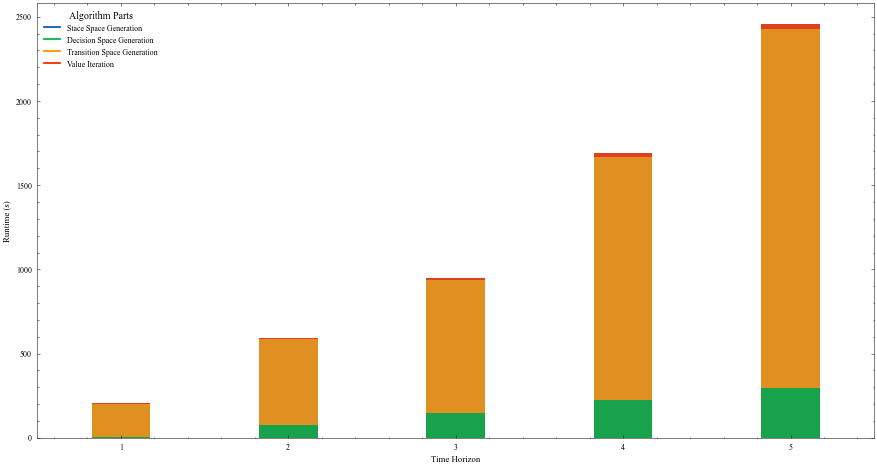

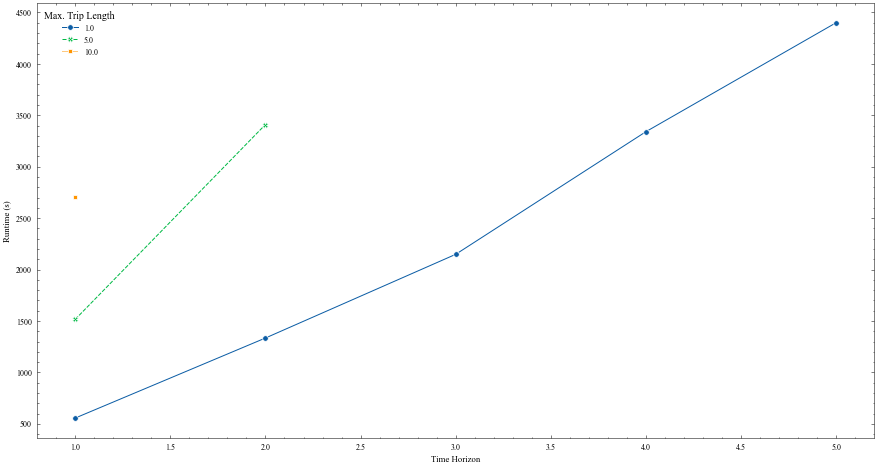

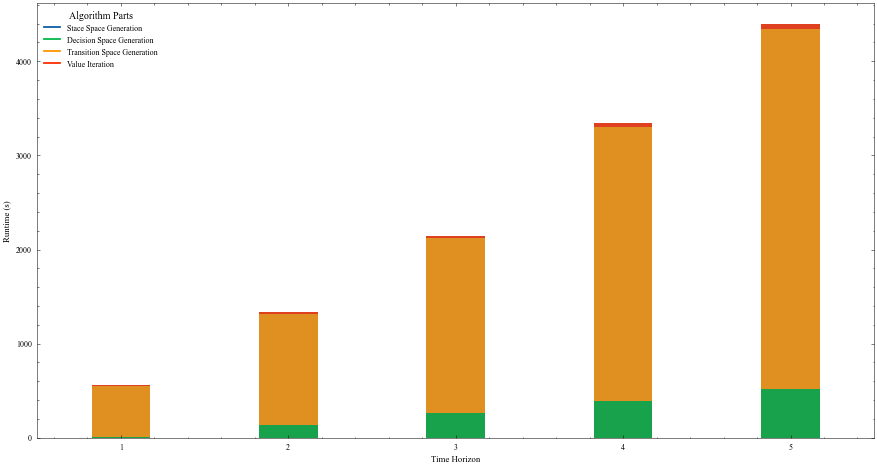

In [38]:
# 3. [VI] Runtime comparison VI
runtime = pd.read_pickle("/usr/app/output/xlsx/%s/rt.pkl" % runs[0][1]).astype({"trip_max":str,"time": float, "T": int})
splitRuntime = pd.read_pickle("/usr/app/output/xlsx/%s/splitrt.pkl" % runs[0][1]).astype({"trip_max":str, "T": int, "t_state": float, "d_state": float, "tr_state": float, "vi": float})

# Runtime
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax = ax, x = 'T', y = 'time', hue = "trip_max", style="trip_max", markers=True, data = runtime)
plttr.change_width(ax, .35)
plttr.formatPlot(g, "Time Horizon", "Runtime (s)", "Value Iteration - Runtime for Different Parameters",None, None, "Max. Trip Length", [str(x) for x in runtime.trip_max.unique()], "upper left")
plts += [("vi_rt_25", plt.gcf())]

# Split runtime
######## IMPORTANT Need to select specific trip max
max_trp_ln = '1.0'
splitRuntime = splitRuntime.loc[(splitRuntime.trip_max == max_trp_ln), ["T","t_state", "d_state", "tr_state", "vi"]]

fig, ax = plt.subplots(figsize=(15, 8))

s1 = sns.barplot(x = 'T', y = 'vi', data = splitRuntime, color = plt.rcParams['axes.prop_cycle'].by_key()['color'][3])
s2 = sns.barplot(x = 'T', y = 'tr_state', data = splitRuntime, color = plt.rcParams['axes.prop_cycle'].by_key()['color'][2])
s3 = sns.barplot(x = 'T', y = 'd_state', data = splitRuntime, color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
g = sns.barplot(x = 'T', y = 't_state', data = splitRuntime, color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plttr.change_width(ax, .35)
plttr.formatPlot(g, "Time Horizon", "Runtime (s)", "Value Iteration - Detailed Runtime for Different Time Horizons (Max. Trip Length = %s)" % max_trp_ln,None, None, "Algorithm Parts", ["Stace Space Generation", "Decision Space Generation", "Transition Space Generation", "Value Iteration"], "upper left")
plts += [("vi_splitrt_25", plt.gcf())]

runtime = pd.read_pickle("/usr/app/output/xlsx/%s/rt.pkl" % runs[1][1]).astype({"trip_max":str,"time": float, "T": int})
splitRuntime = pd.read_pickle("/usr/app/output/xlsx/%s/splitrt.pkl" % runs[1][1]).astype({"trip_max":str, "T": int, "t_state": float, "d_state": float, "tr_state": float, "vi": float})

# Runtime
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax = ax, x = 'T', y = 'time', hue = "trip_max", style="trip_max", markers=True, data = runtime)
plttr.change_width(ax, .35)
plttr.formatPlot(g, "Time Horizon", "Runtime (s)", "Value Iteration - Runtime for Different Parameters",None, None, "Max. Trip Length", [str(x) for x in runtime.trip_max.unique()], "upper left")
plts += [("vi_rt_50", plt.gcf())]

# Split runtime
## Need to select specific trip max
max_trp_ln = '1.0'
splitRuntime = splitRuntime.loc[(splitRuntime.trip_max == max_trp_ln), ["T","t_state", "d_state", "tr_state", "vi"]]

fig, ax = plt.subplots(figsize=(15, 8))

s1 = sns.barplot(x = 'T', y = 'vi', data = splitRuntime, color = plt.rcParams['axes.prop_cycle'].by_key()['color'][3])
s2 = sns.barplot(x = 'T', y = 'tr_state', data = splitRuntime, color = plt.rcParams['axes.prop_cycle'].by_key()['color'][2])
s3 = sns.barplot(x = 'T', y = 'd_state', data = splitRuntime, color = plt.rcParams['axes.prop_cycle'].by_key()['color'][1])
g = sns.barplot(x = 'T', y = 't_state', data = splitRuntime, color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0])
plttr.change_width(ax, .35)
plttr.formatPlot(g, "Time Horizon", "Runtime (s)", "Value Iteration - Detailed Runtime for Different Time Horizons (Max. Trip Length = %s)" % max_trp_ln,None, None, "Algorithm Parts", ["Stace Space Generation", "Decision Space Generation", "Transition Space Generation", "Value Iteration"], "upper left")
plts += [("vi_splitrt_50", plt.gcf())]



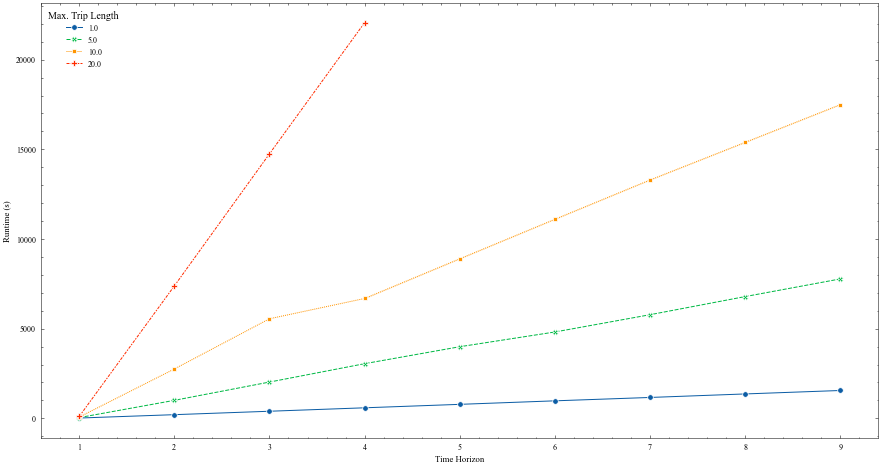

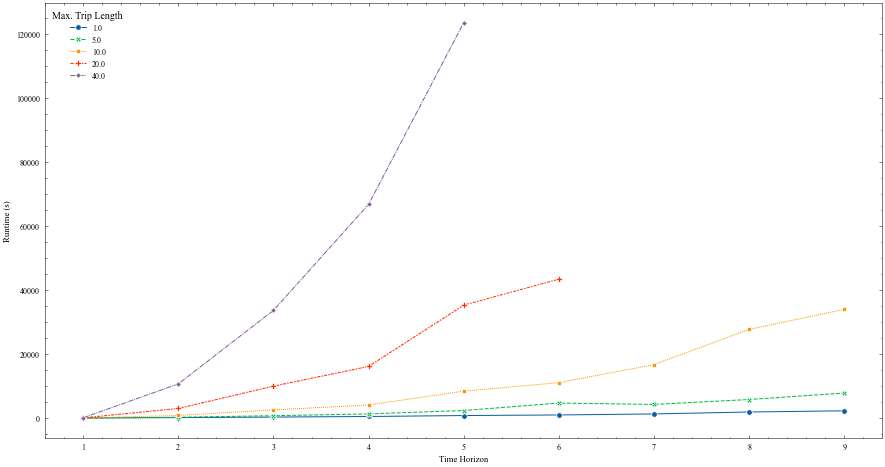

In [9]:
# 3. [~VI] Runtime comparison MO/ADP
runtime = pd.read_pickle("/usr/app/output/xlsx/%s/rt.pkl" % runs[2][1]).astype({"trip_max":str,"time": float, "T": int})

# Runtime
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax = ax, x = 'T', y = 'time', hue = "trip_max", style="trip_max", markers=True, data = runtime)
plttr.change_width(ax, .35)
plttr.formatPlot(g, "Time Horizon", "Runtime (s)", "Myopic Optimization - Runtime for Different Parameters",None, None, "Max. Trip Length", [str(x) for x in runtime.trip_max.unique()], "upper left")
plts += [("mo_rt", plt.gcf())]
          
runtime = pd.read_pickle("/usr/app/output/xlsx/%s/rt.pkl" % runs[3][1]).astype({"trip_max":float,"time": float, "T": int}).sort_values(["T", "trip_max"]).astype({"trip_max":str,"time": float, "T": int})

# Runtime
fig, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax = ax, x = 'T', y = 'time', hue = "trip_max", style="trip_max", markers=True, data = runtime)
plttr.change_width(ax, .35)
plttr.formatPlot(g, "Time Horizon", "Runtime (s)", "Approximate Dynamic Programming - Runtime for Different Parameters",None, None, "Max. Trip Length", [str(x) for x in runtime.trip_max.unique()], "upper left")
plts += [("adp_rt", plt.gcf())]

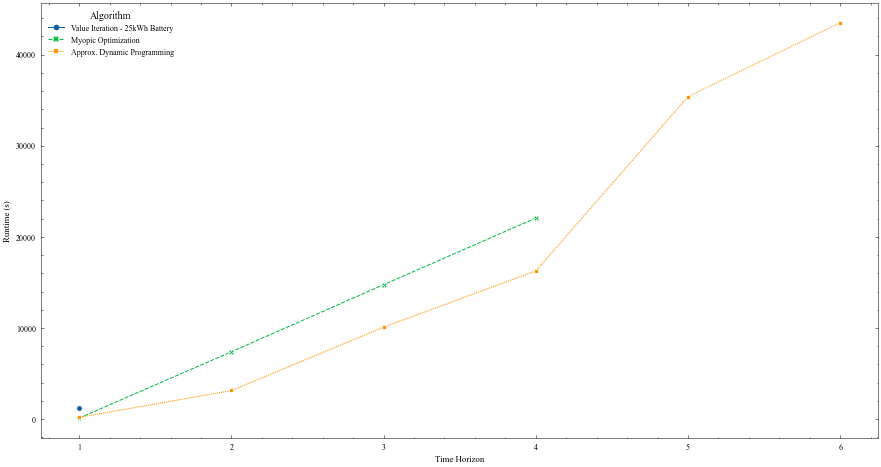

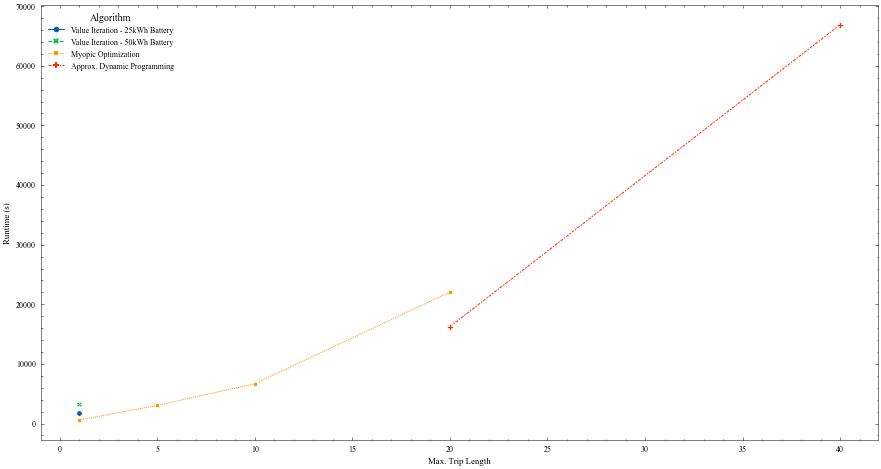

In [32]:
# 3. [ALL] Runtime comparison


####### IMPORTANT - SET PARAM T AND TRIP_MAX ACCORDINGLY
param["trip_max"] = 20
param["T"] = 4

plt_rt = pd.DataFrame()

for algo in runs:
    tmp = pd.read_pickle("/usr/app/output/xlsx/%s/rt.pkl" % algo[1]).astype({"T":int})
    tmp["algo"] = algo[0]
    plt_rt = plt_rt.append(tmp)

plt_rt_t = plt_rt[(plt_rt.trip_max == param["trip_max"])].copy()
plt_rt_trip_max = plt_rt[(plt_rt["T"] == param["T"])].copy()

fig, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax=ax, data=plt_rt_t, x="T", y="time", hue="algo", style="algo", markers=True, legend = True)
plttr.formatPlot(g, "Time Horizon" , "Runtime (s)","Runtime of Algoritms for Different Time Horizons",None, None,"Algorithm")
plts += [("rt_all_t_20_trip_max", plt.gcf())]

fig, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax=ax, data=plt_rt_trip_max, x="trip_max", y="time", hue="algo", style="algo", markers=True, legend = True)
plttr.formatPlot(g, "Max. Trip Length" , "Runtime (s)","Runtime of Algoritms for Different Max. Trip Lengths", None,None, "Algorithm")
plts += [("rt_all_trip_max_5_t", plt.gcf())]

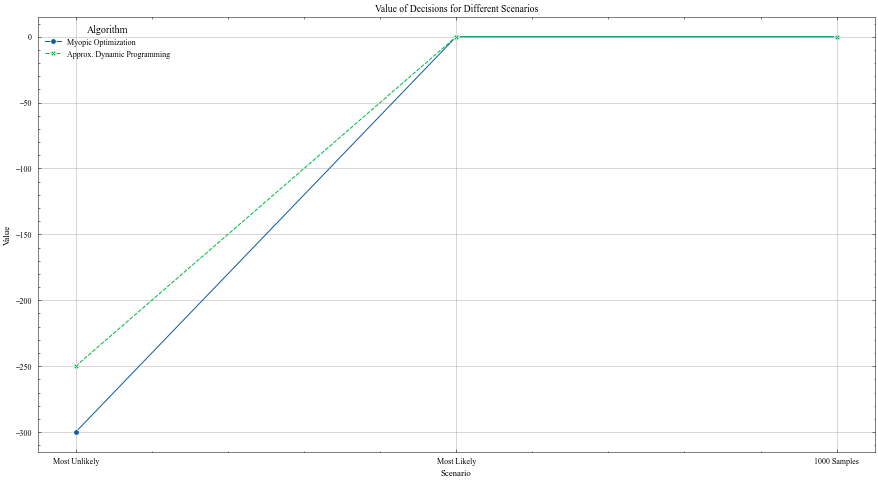

In [37]:
# 4.[~VI] Value according to algorithm and scenario
plt_value = pd.read_pickle("/usr/app/output/xlsx/[%s-%s]-value_comp.pkl" % (param["T"], param["trip_max"]))

fig, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax=ax, data=plt_value, x="Scenario", y="Value", hue="Algorithm",style="Algorithm", markers=True,  legend = False)
plttr.formatPlot(g, "Scenario" , "Value","Value of Decisions for Different Scenarios (T=%d - Max. Trip Length = %s)" % (param["T"], param["trip_max"]),np.arange(0, 3, 1), None, "Algorithm", ['Myopic Optimization', 'Approx. Dynamic Programming'], "upper left")
g.set_xticklabels(["Most Unlikely", "Most Likely", "1000 Samples"])
g.grid()
plts += [("value_comp", plt.gcf())]

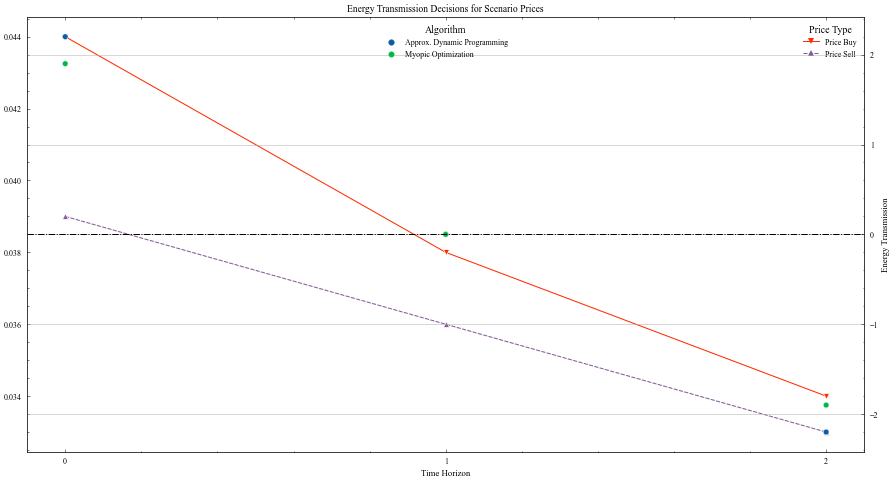

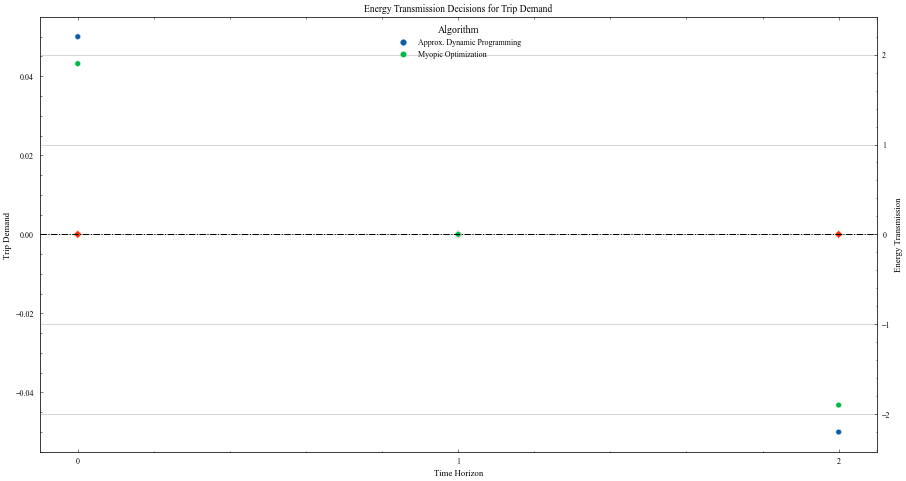

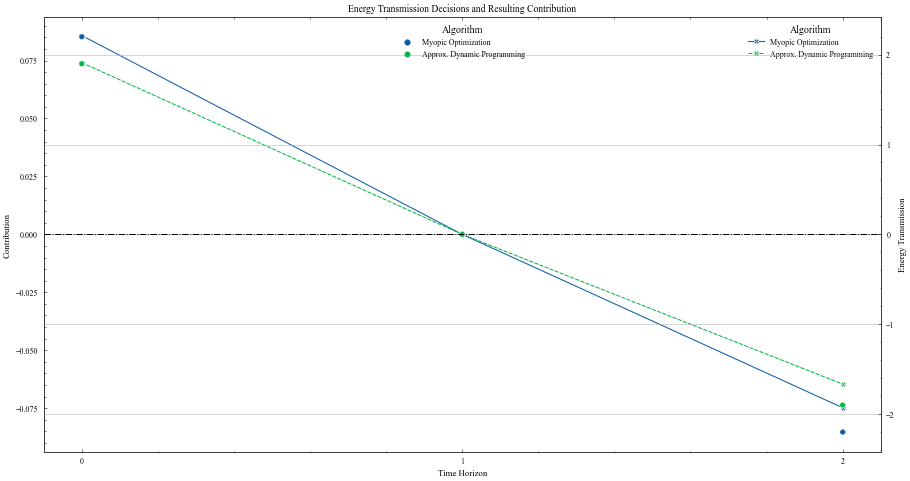

In [41]:
##### TODO legenden unten sich nicht konsistent ###


# 5.[~VI] Decision with price and trip demand
plt_decisions = pd.concat([
    pd.read_pickle("/usr/app/output/xlsx/[%s-%s]-mo_scenarios.pkl" % (param["T"], param["trip_max"])),
    pd.read_pickle("/usr/app/output/xlsx/[%s-%s]-adp_scenarios.pkl" % (param["T"], param["trip_max"]))
]).astype({"t": int, "P_B": float, "P_S": float, "xG2V": float, "xV2G": float})
plt_decisions = plt_decisions.loc[plt_decisions.Scenario == 1]
plt_decisions["xG2V"] = plt_decisions["xG2V"]*-1
plt_decisions["Energy Transmision"] = plt_decisions["xG2V"]+plt_decisions["xV2G"]
plt_decisions = pd.melt(plt_decisions, id_vars=[ x for x in plt_decisions.columns if x not in ["P_B", "P_S"]],value_vars=["P_B", "P_S"], var_name = "Price Type", value_name = "Price")
plt_decisions["Price Type"].replace({"P_B": "Price Buy", "P_S": "Price Sell"}, inplace=True)

fig, ax = plt.subplots(figsize=(15, 8))
g = sns.lineplot(ax=ax, data=plt_decisions, x="t", y="Price", hue="Price Type",style="Price Type", markers=["v","^"],  legend = True,
                   palette = list(plt.rcParams['axes.prop_cycle'].by_key()['color'][3:5]))
plttr.formatPlot(g, "Time Horizon" , None)
ax2 = g.twinx()
g = sns.scatterplot(ax=ax2, data=plt_decisions, x="t", y="Energy Transmision", hue="Algorithm",   legend = True)
plttr.formatPlot(g, "Time Horizon" , "Energy Transmission","Energy Transmission Decisions for Scenario Prices",np.arange(0, plt_decisions["t"].max()+1, 1), None, "Algorithm", ['Approx. Dynamic Programming','Myopic Optimization'], "upper center")
ax2.grid()
g.axhline(0, ls='-.', color = "black")


plts += [("decision_comp_price", plt.gcf())]

fig, ax = plt.subplots(figsize=(15, 8))
g = sns.scatterplot(ax=ax, data=plt_decisions, x="t", y="D", style="smpl", hue="smpl" ,markers=["D"],  legend = False,
                   palette = list(plt.rcParams['axes.prop_cycle'].by_key()['color'][3:4]))
plttr.formatPlot(g, "Time Horizon" , "Trip Demand",None)
ax2 = g.twinx()
g = sns.scatterplot(ax=ax2, data=plt_decisions, x="t", y="Energy Transmision", hue="Algorithm",   legend = True)
plttr.formatPlot(g, "Time Horizon" , "Energy Transmission","Energy Transmission Decisions for Trip Demand",np.arange(0, plt_decisions["t"].max()+1, 1), None, "Algorithm", ['Approx. Dynamic Programming','Myopic Optimization'], "upper center")
ax2.grid()
g.axhline(0, ls='-.', color = "black")


plts += [("decision_comp_demand", plt.gcf())]

fig, ax = plt.subplots(figsize=(15, 8))
g1 = sns.lineplot(ax=ax, data=plt_decisions, x="t", y="Contribution", style="Algorithm", hue="Algorithm" ,markers=["X", "X"],  legend = True,
                   palette = list(plt.rcParams['axes.prop_cycle'].by_key()['color'][0:2]))
plttr.formatPlot(g, "Time Horizon" , "Contribution",None,np.arange(0, plt_decisions["t"].max()+1, 1), None, "Algorithm", ['Myopic Optimization','Approx. Dynamic Programming'], "upper right")
ax2 = g1.twinx()
g = sns.scatterplot(ax=ax2, data=plt_decisions, x="t", y="Energy Transmision", hue="Algorithm",   legend = True,
                   palette = list(plt.rcParams['axes.prop_cycle'].by_key()['color'][0:2]))
plttr.formatPlot(g, "Time Horizon" , "Energy Transmission","Energy Transmission Decisions and Resulting Contribution",np.arange(0, plt_decisions["t"].max()+1, 1), None, "Algorithm", ['Myopic Optimization','Approx. Dynamic Programming'], "upper center")
ax2.grid()
g.axhline(0, ls='-.', color = "black")
align.yaxes(g1, 0, g, 0, 0.5)


plts += [("decision_comp_value", plt.gcf())]

In [10]:
# Export plots
print(plts)
plttr.save(plts)

[('adp_rt', <Figure size 1080x576 with 1 Axes>)]


In [ ]:
## WONT DO
# [VI] 1. Space comparison in dependence of parameters
# Combine spaces
#space = pd.concat([stateSpace, decisionSpace, totalSpace], axis = 1)
#space.reset_index(level=0, inplace=True)
#space.columns = ["Parameter","State", "Decision", "Total"]
#space = pd.melt(space, id_vars=["Parameter"], value_vars=["State", "Decision", "Total"]).astype({"value": int})

#allVar = [("rt", runtime), ("splitrt", splitRuntime), ("space", space), ("sspace", stateSpace), ("dspec", decisionSpace), ("tspace", totalSpace)]
#plts += [("space_comparison", p.plot_space(allVar[2]))]